<a href="https://colab.research.google.com/github/cristiangomez811/aprendizaje_python/blob/master/python_deep_learning/Cap5_Redes_Neuronales_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cap5  Redes neuronales en Keras

En este capitulo se aborda el problema de reconocimiento de  
  dígitos **MNIST** presentada en el Cap4 de forma teoríca;    
está vez usando la api **Keras** 

In [33]:
#Comando para especificar la versión de TensorFlow
%tensorflow_version 2.x

In [34]:
#Importar la libreria TF
import tensorflow as tf

#Validar si hay disponible una GPU
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [35]:
# Versión de TF 
print(tf.__version__)

2.3.0


In [36]:
#Para Keras
from tensorflow import keras
print(tf.keras.__version__)

2.4.0


In [37]:
# Precarga de datos
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

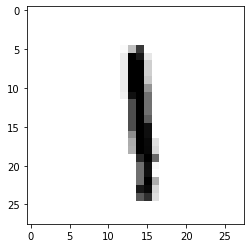

In [38]:
# visualización de los datos
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [39]:
#etiqueta correspondiente
print(y_train[8])

1


In [40]:
#forma del set
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

3
(60000, 28, 28)
uint8


## Preprocesado de datos de entrada

En esta parte se va a hacer una normalización y re escalado de los datos de entrada

In [41]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [42]:
# reescalado

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [43]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Aúnque se ha cambiado la forma del tensor no cambia el total de datos por lo tanto no hay que cambiar el etiquetado. 

In [44]:
# Etiquetado por one-hot encoding usando la funcion de soporte to_categorical
from tensorflow.keras.utils import to_categorical

In [45]:
#efectos antes y despues del to_categorical
print(y_test[0])
print(y_train[0])
print(y_test.shape)
print(y_train.shape)

7
5
(10000,)
(60000,)


In [46]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [47]:
print(y_test.shape)
print(y_train.shape)

(10000, 10)
(60000, 10)


## Definición del modelo

La estructura de datos principal en Keras es la clase *Sequential*, que permite la creación de una neurona básica. Kerans ofrece también una API que permite implementar modelos complejos en forma de grafo. 

In [48]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model = keras.Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

En este paso se define una red de dos capas full-conected de 10 neuronas cada una, con 255 parametros de entrada y una funión *softmax* de salida

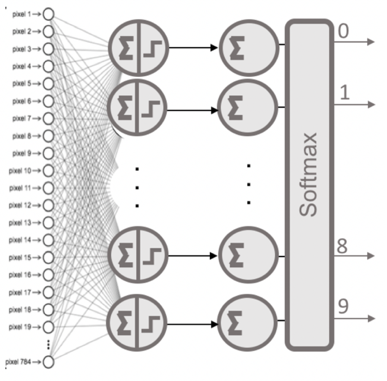

In [49]:
# comprobando la arquitectura
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [50]:
# proceso de entrenado
model.compile(loss='categorical_crossentropy', #función de coste crosentropia categorica
    optimizer='sgd', # optimizador stocastig gradient descent (sgd)
    metrics = ['accuracy']) # la metrica


In [51]:
# entrenamiento
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9009 - accuracy: 0.5189
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2770 - accuracy: 0.7219
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9436 - accuracy: 0.7904
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7657 - accuracy: 0.8292
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6577 - accuracy: 0.8500


## Evaluación del modelo

Ahora que el modelo está entrenado, se evaluará contra   
datos nuevos de prueba (test) para esto se puede usar el metodo *evaluate()*

In [52]:
# este metodo indica que tan bien se ajusta el modelo a datos que nunca ha visto
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6031 - accuracy: 0.8678


In [53]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8677999973297119


Existen otras metricas además del *accuracy* como el *Recall*.  
Aúnque para este ejercicio es suficiente con el accuracy voy a  
dejar las formulas para ser tenidas en cuenta. 



*   **VP**, cantidad de positivos clasificados correctamente

*   **VN**, cantidad de negativos clasificados correctamente

*   **FV**, cantidad de positivos clasificados incorrectamente

*   **FP**, cantidad de negativos clasificados incorrectamente


accuracy = (VP + VN)/(VP + FP + VN + FN)

recall = VP/(VP + FN)

## Generación de predicciones

Finalmente se puede usar el metodo *predict()* de un modelo ya entrenado

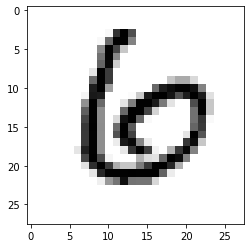

In [54]:
# visualizamos la imagen para comprobar por nosotros si el modelo predice correctamente

x_test_old = x_test.reshape(10000, 28,28) # re escalada para visualizar el dato original
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [63]:
predictions = model.predict(x_test)

In [64]:
import numpy as np
#dado que la respuesta es un array de probabilidades 
print(predictions[11],'\n')
# se puede usar la función argmax para obtener el indice con mayor probabilidad
print(np.argmax(predictions[11]),'\n')
#finalmente para comprobar que es una distribución correcta 
print(np.sum(predictions[11]))

[0.08084693 0.03566892 0.2197543  0.04375184 0.0538721  0.0475993
 0.38935032 0.00428799 0.10433397 0.02053435] 

6 

1.0000001
